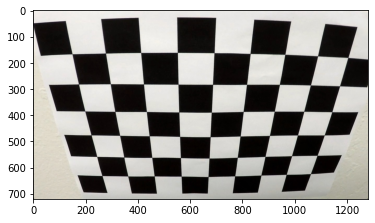

In [48]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pickle
%matplotlib inline
# read in a calibration image
img = mpimg.imread('./camera_cal/calibration2.jpg')
plt.imshow(img)

True


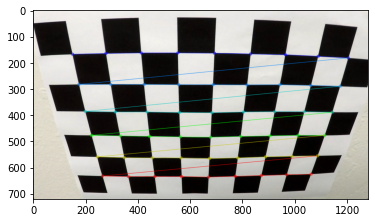

In [64]:
%matplotlib inline
img = mpimg.imread('./camera_cal/calibration2.jpg')
# Arrays to store object points and image points from all the images
objpoints =  []# 3d points in real world space
imgpoints = []# 2d points in image space
#prepare object points 
nx = 9
ny = 6
objp = np.zeros((nx*ny,3),np.float32) # z is set to 0
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) # x, y coordinates

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
print (ret)
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    plt.imshow(img)

True

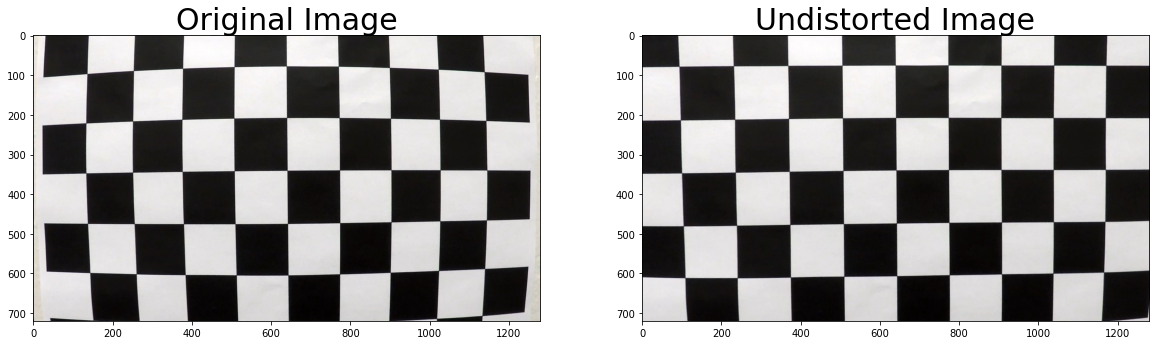

In [65]:

# Test undistortion on an image
img = mpimg.imread('./camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize the undistortion images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

#dst is the image data genertated, filename is the name that I want to save
cv2.imwrite('undistorted_of1.png',dst)

In [66]:
#In the following, I will use about 20 images to get objpoints and imgpoints
nx = 9
ny = 6
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images
objpoints= []# 3d points in real world space
imgpoints= []# 2d points in image space

#make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

#Step through the list and search for chessboard corners
for frame in images:
    img = cv2.imread(frame)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

True

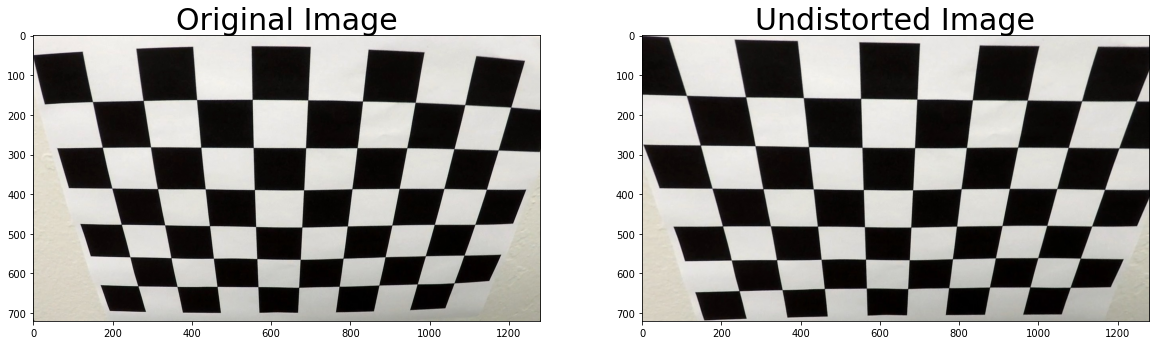

In [72]:

# Test undistortion on an image
img = mpimg.imread('./camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize the undistortion images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

#dst is the image data genertated, filename is the name that I want to save
cv2.imwrite('./output_images/undistorted_of2.png',dst)

In [68]:
# Save the camera calibration result for later use 
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )

In [69]:
#load distortion matrix from camera_cal
with open('./camera_cal/wide_dist_pickle.p',mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle['mtx']
    dist = dist_pickle["dist"]
print(mtx)
print(dist)

[[1.15777930e+03 0.00000000e+00 6.67111054e+02]
 [0.00000000e+00 1.15282291e+03 3.86128938e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.24688775 -0.02373132 -0.00109842  0.00035108 -0.00258571]]


True

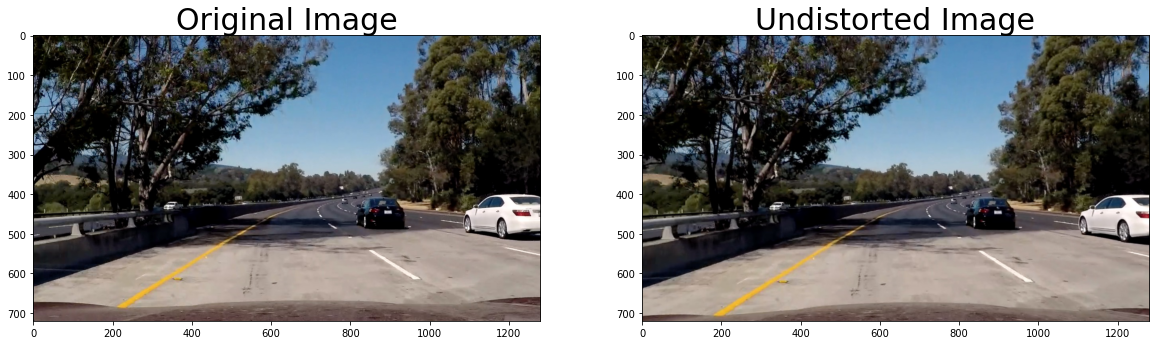

In [73]:
img = mpimg.imread('test_images/test5.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize the undistortion images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
cv2.imwrite('./output_images/undistorted_of_test5.png',dst)